In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
# df['mainroad','guestroom'] = df['mainroad'].map({'yes': 1, 'no': 0})
df.columns


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
columns_to_convert = ['mainroad', 'guestroom', 'basement','hotwaterheating','airconditioning',"prefarea"]  # Replace with your column names

conversion_mapping = {'yes': 1, 'no': 0}  # Mapping for conversion

df[columns_to_convert] = df[columns_to_convert].replace(conversion_mapping)


In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [7]:
df.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [8]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [9]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [10]:
grouped_count = grouped_df.count()
print(grouped_count)

NameError: name 'grouped_df' is not defined

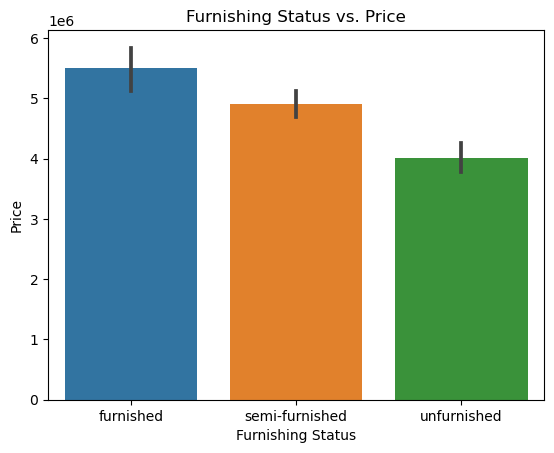

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='furnishingstatus', y='price', data=df)

plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Furnishing Status vs. Price')

plt.show()

In [ ]:
print(df.columns)




Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:
print(df.dtypes)



price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


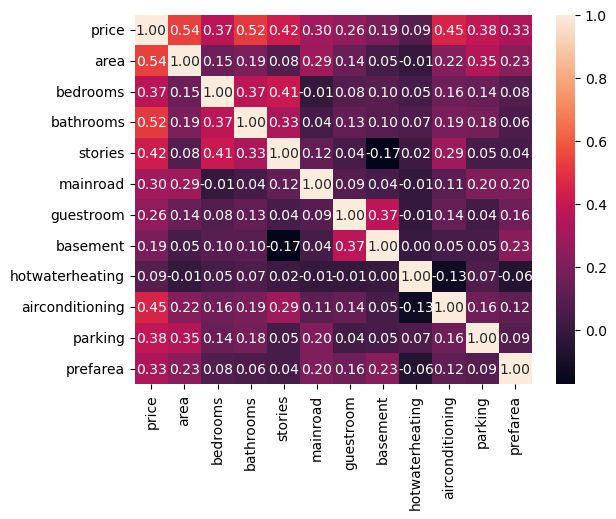

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

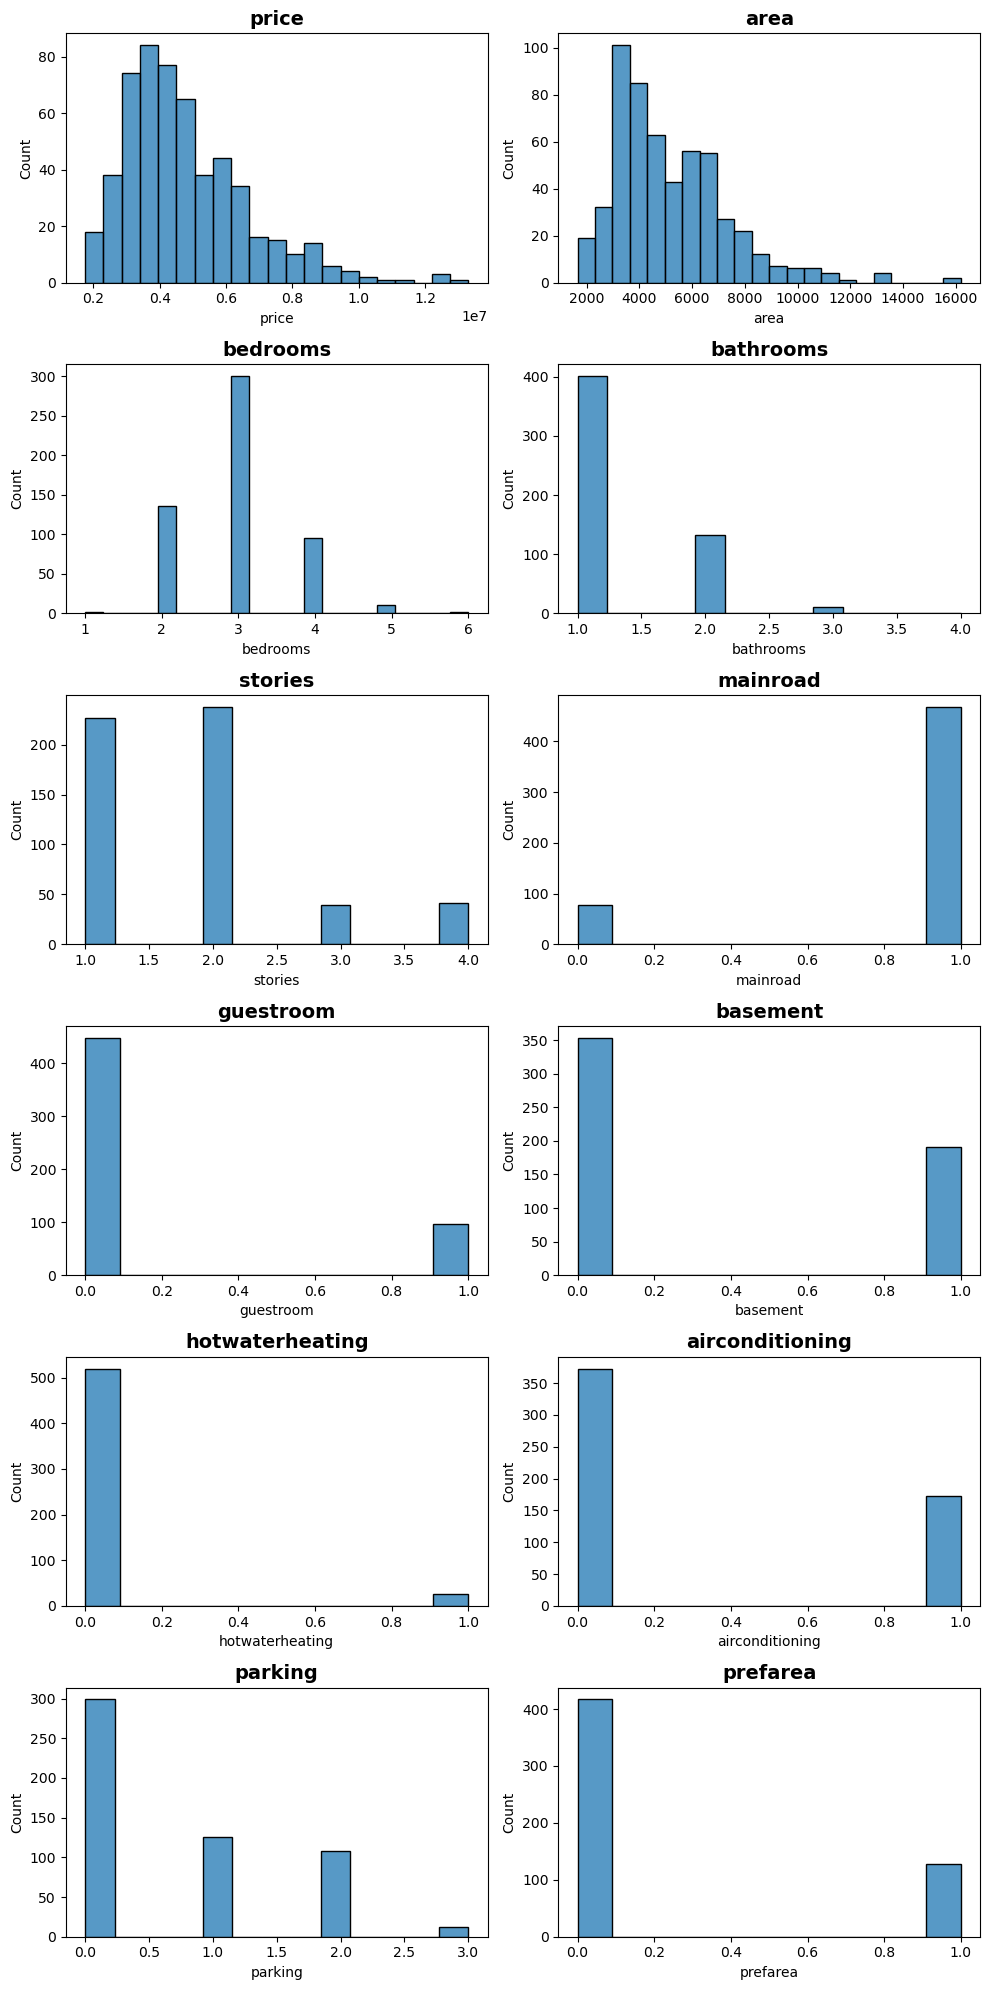

In [ ]:
plt.figure(figsize=(10,20))

for i,num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6,2, i + 1)
    sns.histplot(x=df[num])
    plt.title(num, fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


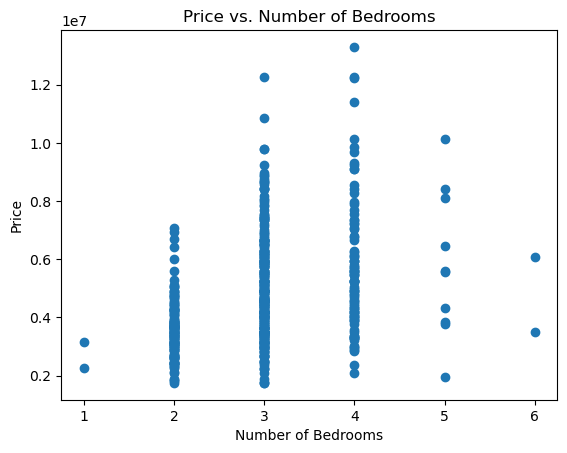

In [ ]:
plt.scatter(df['bedrooms'], df['price'])

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms')

plt.show()

In [ ]:
# converting object types to int
col_convert = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

for col in col_convert:
    df[col], _ = pd.factorize(df[col])
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,0,0,0,0,2,0,0
1,12250000,8960,4,4,4,0,0,0,0,0,3,1,0
2,12250000,9960,3,2,2,0,0,1,0,1,2,0,1
3,12215000,7500,4,2,2,0,0,1,0,0,3,0,0
4,11410000,7420,4,1,2,0,1,1,0,0,2,1,0


In [ ]:
df['furnishingstatus'].unique()

array([0, 1, 2])

In [ ]:
 # dependent and independent variable selection
y = df["price"]
X = df.drop("price", axis=1)

# data set split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# model accuracy
score = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()
print(score)

0.6265552522639346


In [ ]:
# Linear Model Tuning

model_tune = LinearRegression()

param_dist = {'fit_intercept':[True, False],
             'n_jobs':[None, -1]}

grid_search = GridSearchCV(model, param_dist, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best parameter combine: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameter combine:  {'fit_intercept': True, 'n_jobs': None}
Best score:  0.6265552522639346


In [ ]:
def predict_price(model, input_data):
    # Make predictions using the trained model
    predicted_price = model.predict(input_data)
    
    # Display the predicted price
    print("Predicted Price:", predicted_price)
    return predicted_price

# Example usage of the predict_price function
test_data = pd.DataFrame({
 'area': [7420],
 'bedrooms': [4],
 'bathrooms': [2],
 'stories': [3],
 'mainroad': [0],
 'guestroom': [0],
 'basement': [0],
 'hotwaterheating': [0],
 'airconditioning': [0],
 'parking': [2],
 'prefarea': [0],
 'furnishingstatus': [0]})

# Preprocess the test_data to match the format of the training data
test_data_encoded = pd.get_dummies(test_data)
test_data_processed = X_train.columns.intersection(test_data_encoded.columns)
test_data_encoded = test_data_encoded[test_data_processed]

# Call the predict_price function with the trained model and preprocessed test_data
p=predict_price(model, test_data)
p

Predicted Price: [8020894.34927404]


array([8020894.34927404])

In [ ]:
df.loc[0]['price'].dtype


dtype('int64')

In [ ]:
df.loc[0]['price']-p

array([5279105.65072596])